## Version T_01_13

- set data_lengths to 60

In [ ]:
run_this_0 = False
if run_this_0:
    #!pip install pandas
    !pip install scikit-learn
    !pip install tensorflow-cpu
    !pip install numpy pandas keras scikit-learn matplotlib scikeras
    print(f'completed to install library. [{datetime.now()}]')

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import warnings
from datetime import datetime
from lib.rf_data_util import load_data_by_db, create_randomforest_db, insert_randomforest_db, main_predict
from lib.rf_data_util import predict_and_test, list_to_dict, rf_prediction_test, rf_predict, print_predicts
from lib.rf_data_util import main, main_process, draw_data_graph

version="T_01_13"
LAST_ROUND=1177
data_length=100

# 불필요한 경고 메시지를 숨깁니다.
warnings.filterwarnings('ignore')

print(f'completed to load library. [{datetime.now()}]')

completed to load library. [2025-06-27 18:45:03.502192]


In [2]:
def draw_graph(version, condition, file_name):
    """ draw_graph """
    data = !echo "select * from rndforest where version=\"{version}\"" | sqlite3 ../db/metrics.db
    if len(data) > 0:
        data_cols = data[0].split('|')
        x_data = [int(i) for i in data_cols[4].split(',')]
        y_data = [int(i) for i in data_cols[5].split(',')]
        x_label = 'round'
        y_label = 'count'
        draw_data_graph(title='frequency',
                        info=condition,
                        x_data=x_data,
                        y_data=y_data,
                        x_label=x_label,
                        y_label=y_label,
                        width=0,
                        height=0,
                        file_name=file_name,
                        is_bar=False,
                        verb=False)
    else:
        print('Have no data.')

print(f'completed to define draw_graph. [{datetime.now()}]')

completed to define draw_graph. [2025-06-27 18:45:03.506817]


In [3]:
created_db = True
if created_db == False:
    create_randomforest_db('../db/metrics.db')
print(f'completed to create db. [{datetime.now()}]')

completed to create db. [2025-06-27 18:45:04.217360]


In [4]:
verbose = 1

# 실제 번호
actual_numbers_or, _ = load_data_by_db(db_file_path='../db/metrics.db',
                                 last_round=LAST_ROUND,
                                 length=10, reverse=True)
actual_numbers = [actual_sets[1] for actual_sets in actual_numbers_or]

if verbose > 0:
    print('actual_numbers', type(actual_numbers), actual_numbers)

data_list_cnt = 3
data_length = data_length
results_set=[]

print(f'completed to set env. [{datetime.now()}]')

actual_numbers <class 'list'> [[3, 7, 15, 16, 19, 43], [7, 9, 11, 21, 30, 35], [3, 4, 6, 8, 32, 42], [8, 11, 14, 17, 36, 39], [1, 5, 18, 20, 30, 35], [7, 9, 24, 40, 42, 44], [3, 6, 7, 11, 12, 17], [3, 13, 28, 34, 38, 42], [5, 12, 24, 26, 39, 42], [9, 21, 24, 30, 33, 37], [8, 23, 31, 35, 39, 40]]
completed to set env. [2025-06-27 18:45:05.289524]


**Notice**
- the random_state parameter is used to control the randomness of the algorithm, ensuring reproducibility of results. 
- the n_estimators parameter specifies the number of decision trees in the forest. This parameter is crucial as it directly impacts the model's performance and computational cost.

## Generate Prediction

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate some sample data
X, y = make_regression(n_samples=100, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor with verbose=0 to turn off verbose output
model = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1)

# Fit the model (no verbose output will be displayed during fitting)
model.fit(X_train, y_train)

print("Model fitting complete.")

Model fitting complete.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [6]:
c_data_length=10
parameters = {
    "n_estimators": [10],
    "data_lengths": [c_data_length],
    "random_state_gap": 1,
    "random_state_begin": 113300,
    # "random_state_end": 114001,
    "random_state_end": 113301,
    "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
    "db_file_path": '../db/metrics.db',
    "write_db_file_path": '../db/metrics.db'
}

result_sets = main(parameters=parameters, version=version, sum_min=0, sum_max=-1, trial=1, write_to_db=True, verbose=0)

start   [now=2025-06-23 12:04:08.191552]
../db/metrics.db
dict_keys(['n_estimators', 'data_lengths', 'random_state_gap', 'random_state_begin', 'random_state_end', 'last_rounds', 'db_file_path', 'write_db_file_path'])
main.db_file_path =  ../db/metrics.db
completed [now=2025-06-23 12:04:12.530936]
start to read and write data: [now=2025-06-23 12:04:12.531032]
/home/jovyan/work/LSTM_Analyze/foresttrans
db_file_path ../db/metrics.db
complete to read and data: [now=2025-06-23 12:04:12.536101]


## 데이터 검증 코드

In [ ]:
version="T_01_10"
!echo "delete from rndforest where version=\"{version}\"" | sqlite3 ../db/metrics.db
parameters = {
    "n_estimators": [45],
    "data_lengths": [21],
    "random_state_gap": 1,
    "random_state_begin": 101700,
    "random_state_end": 101701,
    "last_rounds": [i for i in range(LAST_ROUND, 900, -1)],
    "db_file_path": '../db/metrics.db',
    "write_db_file_path": '../db/metrics.db'
}
result_sets = main(parameters=parameters, version=version, sum_min=0, sum_max=-1, trial=1, write_to_db=True)

In [ ]:
## SQL Query
data = !echo "select * from rndforest where version=\"{version}\"" | sqlite3 ../db/metrics.db
if len(data) > 0:
    data_cols = data[0].split('|')
    x_data = [int(i) for i in data_cols[4].split(',')]
    y_data = [int(i) for i in data_cols[5].split(',')]
    x_label = 'round'
    y_label = 'count'
    draw_data_graph(title='frequency',
                    x_data=x_data,
                    y_data=y_data,
                    x_label=x_label,
                    y_label=y_label,
                    width=0,
                    height=0,
                    file_name="",
                    is_bar=False,
                    verb=False)
else:
    print('Have no data.')

In [ ]:
"""
['10', '400', '338000', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '3,3,1,0,3,0,1,3,3,2', '19', 'T_01_08'],
['10', '400', '74730', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,1,1,3,1,0,0,3,1', '14', 'T_01_08']
['25', '400', '116690', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,2,2,3,0,3,2,1,1', '18', 'T_01_08']
['10', '400', '129020', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '0,0,0,1,0,0,0,0,0,0', '1', 'T_01_08']
"""
!echo "delete from rndforest where version=\"{version}\"" | sqlite3 ../db/metrics.db
parameters = {
    "n_estimators": [25],
    "data_lengths": [400],
    "random_state_gap": 1,
    "random_state_begin": 116690,
    "random_state_end": 116691,
    "last_rounds": [i for i in range(LAST_ROUND, 900, -1)],
    "db_file_path": '../db/metrics.db',
    "write_db_file_path": '../db/metrics.db'
}
result_sets = main(parameters=parameters, version=version, sum_min=0, sum_max=-1, trial=1, write_to_db=True)

In [ ]:
## SQL Query
data = !echo "select * from rndforest where version=\"{version}\"" | sqlite3 ../db/metrics.db
if len(data) > 0:
    data_cols = data[0].split('|')
    x_data = [int(i) for i in data_cols[4].split(',')]
    y_data = [int(i) for i in data_cols[5].split(',')]
    x_label = 'round'
    y_label = 'count'
    draw_data_graph(title='frequency',
                    x_data=x_data,
                    y_data=y_data,
                    x_label=x_label,
                    y_label=y_label,
                    width=0,
                    height=0,
                    file_name="",
                    is_bar=False,
                    verb=False)
else:
    print('Have no data.')

In [7]:
t_version="T_01_95"
"""
['10', '400', '338000', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '3,3,1,0,3,0,1,3,3,2', '19', 'T_01_08'],
['10', '400', '74730', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,1,1,3,1,0,0,3,1', '14', 'T_01_08']
['25', '400', '116690', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,2,2,3,0,3,2,1,1', '18', 'T_01_08']
['10', '400', '129020', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '0,0,0,1,0,0,0,0,0,0', '1', 'T_01_08']
39874|25|400|383080|1175,1174,1173,1172,1171,1170,1169,1168,1167,1166|0,0,0,0,0,1,0,0,0,0|1|T_01_08
41795|10|400|302290|1175,1174,1173,1172,1171,1170,1169,1168,1167,1166|1,0,0,0,0,0,0,0,0,0|1|T_01_08
42155|10|400|305890|1175,1174,1173,1172,1171,1170,1169,1168,1167,1166|1,0,0,0,0,0,0,0,0,0|1|T_01_08

    (25, 451600, [4, 3], 6),
    (25, 489000, [4, 3], 6),
    (6, 473900, [4, 4], 6),
    (10, 113700, [4, 4], 6),
"""
!echo "delete from rndforest where version=\"{t_version}\"" | sqlite3 ../db/metrics.db
t_parameters = {
    "img/T_01_95_1.png":{
        "n_estimators": [10],
        "data_lengths": [data_length],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 11370001,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_2.png":{
        "n_estimators": [90],
        "data_lengths": [90],
        "random_state_gap": 1,
        "random_state_begin": 11370000,
        "random_state_end": 11370001,
        "last_rounds": [i for i in range(LAST_ROUND, 760, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_3.png":{
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 760, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_4.png":{
        "n_estimators": [90],
        "data_lengths": [45],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 710, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_5.png":{
        "n_estimators": [6],
        "data_lengths": [6],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 660, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_6.png":{
        "n_estimators": [45],
        "data_lengths": [19],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 680, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_7.png":{
        "n_estimators": [10],
        "data_lengths": [21],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 690, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_8.png":{
        "n_estimators": [6],
        "data_lengths": [15],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 690, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_9.png":{
        "n_estimators": [6],
        "data_lengths": [11],
        "random_state_gap": 1,
        "random_state_begin": 473900,
        "random_state_end": 473901,
        "last_rounds": [i for i in range(LAST_ROUND, 690, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_10.png":{
        "n_estimators": [10],
        "data_lengths": [38],
        "random_state_gap": 1,
        "random_state_begin": 338000,
        "random_state_end": 338001,
        "last_rounds": [i for i in range(LAST_ROUND, 708, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_11.png":{
        "n_estimators": [25],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 116690,
        "random_state_end": 116691,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_12.png":{
        "n_estimators": [10],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 74730,
        "random_state_end": 74731,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_13.png":{
        "n_estimators": [10],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 338000,
        "random_state_end": 338001,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_14.png":{
        "n_estimators": [10],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 129020,
        "random_state_end": 129020,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_96_1.png":{
        "n_estimators": [25],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 116690,
        "random_state_end": 116691,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_97_1.png":{
        "n_estimators": [45],
        "data_lengths": [21],
        "random_state_gap": 1,
        "random_state_begin": 101700,
        "random_state_end": 101701,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    ,
    "img/T_01_95_114116.png":{
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 114116,
        "random_state_end": 114117,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
}


In [7]:
t_version="T_01_95"
"""
['10', '400', '338000', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '3,3,1,0,3,0,1,3,3,2', '19', 'T_01_08'],
['10', '400', '74730', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,1,1,3,1,0,0,3,1', '14', 'T_01_08']
['25', '400', '116690', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,2,2,3,0,3,2,1,1', '18', 'T_01_08']
['10', '400', '129020', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '0,0,0,1,0,0,0,0,0,0', '1', 'T_01_08']
39874|25|400|383080|1175,1174,1173,1172,1171,1170,1169,1168,1167,1166|0,0,0,0,0,1,0,0,0,0|1|T_01_08
41795|10|400|302290|1175,1174,1173,1172,1171,1170,1169,1168,1167,1166|1,0,0,0,0,0,0,0,0,0|1|T_01_08
42155|10|400|305890|1175,1174,1173,1172,1171,1170,1169,1168,1167,1166|1,0,0,0,0,0,0,0,0,0|1|T_01_08

    (25, 451600, [4, 3], 6),
    (25, 489000, [4, 3], 6),
    (6, 473900, [4, 4], 6),
    (10, 113700, [4, 4], 6),
"""
!echo "delete from rndforest where version=\"{t_version}\"" | sqlite3 ../db/metrics.db
t_parameters = {
    "img/T_01_95_1.png":{
        "n_estimators": [10],
        "data_lengths": [data_length],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 11370001,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_2.png":{
        "n_estimators": [90],
        "data_lengths": [90],
        "random_state_gap": 1,
        "random_state_begin": 11370000,
        "random_state_end": 11370001,
        "last_rounds": [i for i in range(LAST_ROUND, 760, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_3.png":{
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 760, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_4.png":{
        "n_estimators": [90],
        "data_lengths": [45],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 710, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_5.png":{
        "n_estimators": [6],
        "data_lengths": [6],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 660, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_6.png":{
        "n_estimators": [45],
        "data_lengths": [19],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 680, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_7.png":{
        "n_estimators": [10],
        "data_lengths": [21],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 690, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_8.png":{
        "n_estimators": [6],
        "data_lengths": [15],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 690, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_9.png":{
        "n_estimators": [6],
        "data_lengths": [11],
        "random_state_gap": 1,
        "random_state_begin": 473900,
        "random_state_end": 473901,
        "last_rounds": [i for i in range(LAST_ROUND, 690, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_10.png":{
        "n_estimators": [10],
        "data_lengths": [38],
        "random_state_gap": 1,
        "random_state_begin": 338000,
        "random_state_end": 338001,
        "last_rounds": [i for i in range(LAST_ROUND, 708, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_11.png":{
        "n_estimators": [25],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 116690,
        "random_state_end": 116691,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_12.png":{
        "n_estimators": [10],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 74730,
        "random_state_end": 74731,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_13.png":{
        "n_estimators": [10],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 338000,
        "random_state_end": 338001,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_95_14.png":{
        "n_estimators": [10],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 129020,
        "random_state_end": 129020,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_96_1.png":{
        "n_estimators": [25],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 116690,
        "random_state_end": 116691,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    "img/T_01_97_1.png":{
        "n_estimators": [45],
        "data_lengths": [21],
        "random_state_gap": 1,
        "random_state_begin": 101700,
        "random_state_end": 101701,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
    ,
    "img/T_01_95_114116.png":{
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 114116,
        "random_state_end": 114117,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": t_version
    },
}


In [8]:
def delete_file(path, except_files: list):
    """ delete_file """
    import os
    file_list = os.listdir(path)
    for file in file_list:
        if file.endswith('png'):
            if file not in except_files:
                file_path = path + '/' + file
                print(file_path)
                os.remove(file_path)

In [ ]:
## predict all data
except_files = []
img_path = "./img"

delete_file(path=img_path, except_files=except_files)

for key in t_parameters:
    c_version = t_parameters[key]["version"]
    if c_version == "T_01_95":
        !echo "delete from rndforest where version=\"{c_version}\"" | sqlite3 ../db/metrics.db
        main(parameters=t_parameters[key], version=c_version, sum_min=0, sum_max=-1, trial=1, write_to_db=True, verbose=0)
    print(f"{key}, {result_sets}, {len(result_sets)} [now: {datetime.now()}]")
    condition = {
        "n_estimators": t_parameters[key]["n_estimators"],
        "data_lengths": t_parameters[key]["data_lengths"],
        "random_state_gap": t_parameters[key]["random_state_gap"],
        "random_state_begin": t_parameters[key]["random_state_begin"],
        "random_state_end": t_parameters[key]["random_state_end"],
        }
    file_name = key
    draw_graph(version=c_version, condition=condition, file_name=file_name)

start   [now=2025-06-23 12:38:25.148884]
../db/metrics.db
dict_keys(['n_estimators', 'data_lengths', 'random_state_gap', 'random_state_begin', 'random_state_end', 'last_rounds', 'db_file_path', 'write_db_file_path', 'version'])
main.db_file_path =  ../db/metrics.db
completed [now=2025-06-23 12:38:31.356609]
start to read and write data: [now=2025-06-23 12:38:31.356724]
/home/jovyan/work/LSTM_Analyze/foresttrans
db_file_path ../db/metrics.db
complete to read and data: [now=2025-06-23 12:38:31.360215]
completed [now=2025-06-23 12:38:37.344060]
start to read and write data: [now=2025-06-23 12:38:37.344158]
/home/jovyan/work/LSTM_Analyze/foresttrans
db_file_path ../db/metrics.db
complete to read and data: [now=2025-06-23 12:38:37.347298]


In [ ]:
#45,96800,4,3,1
"""
['25', '400', '44510', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '0,1,0,3,2,0,1,3,3,1', '14', 'T_01_08']
['10', '400', '392390', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,1,2,1,2,1,0,1,3,3', '15', 'T_01_08']
['25', '400', '111570', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,0,0,0,0,0,3,3,0,0', '7', 'T_01_08']
['10', '400', '160040', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,0,0,0,1,1,0,1,3,0', '7', 'T_01_08']
['25', '400', '396820', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '0,0,0,0,0,0,0,0,3,0', '3', 'T_01_08']
"""
parameters = [
    {
        "n_estimators": [25],
        "data_lengths": [120],
        "random_state_gap": 1,
        "random_state_begin": 396831,
        "random_state_end": 396832,
        "last_rounds": [i for i in range(LAST_ROUND, 790, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_94"
        },
    {
        "n_estimators": [25],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 396831,
        "random_state_end": 396832,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_94"
    },
    {
        "n_estimators": [10],
        "data_lengths": [40],
        "random_state_gap": 1,
        "random_state_begin": 31390,
        "random_state_end": 31391,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_95"
    }
]

## predict data
file_name = "img/temp.png"

!echo "delete from rndforest where version=\"{parameters_1["version"]}\"" | sqlite3 ../db/metrics.db

result_sets = main(parameters=parameters_1,
                   version=parameters_1["version"],
                   sum_min=0,
                   sum_max=-1,
                   trial=1,
                   write_to_db=True)
## SQL Query
condition = {
    "n_estimators": parameters_1["n_estimators"],
    "data_lengths": parameters_1["data_lengths"],
    "random_state_gap": parameters_1["random_state_gap"],
    "random_state_begin": parameters_1["random_state_begin"],
    "random_state_end": parameters_1["random_state_end"],
}
print(f'draw graph : [{datetime.now()}')
 
draw_graph(version=parameters_1["version"], condition=condition, file_name=file_name)
data = !echo "select * from rndforest where version=\"{parameters_1["version"]}\"" | sqlite3 ../db/metrics.db
print(data)

In [ ]:
#45,96800,4,3,1
"""
"""
T_VERSION=version
DB_FILE="../db/metrics.db"

rows = !echo "select * from rndforest where version={T_VERSION}" | sqlite3 {DB_FILE}

for row in rows:
    print(row)

# ## predict data
# file_name = "img/temp.png"

# !echo "delete from rndforest where version=\"{parameters_1["version"]}\"" | sqlite3 "DB_FILE"


# result_sets = main(parameters=parameters_1,
#                    version=parameters_1["version"],
#                    sum_min=0,
#                    sum_max=-1,
#                    trial=1,
#                    write_to_db=True)
# ## SQL Query
# condition = {
#     "n_estimators": parameters_1["n_estimators"],
#     "data_lengths": parameters_1["data_lengths"],
#     "random_state_gap": parameters_1["random_state_gap"],
#     "random_state_begin": parameters_1["random_state_begin"],
#     "random_state_end": parameters_1["random_state_end"],
# }
# print(f'draw graph : [{datetime.now()}')
 
# draw_graph(version=parameters_1["version"], condition=condition, file_name=file_name)
# data = !echo "select * from rndforest where version=\"{parameters_1["version"]}\"" | sqlite3 ../db/metrics.db
# print(data)

## 이전 테스트 데이터 목록

```
(25, 219100, [3, 4], 0)
(25, 560100, [3, 4], 0)
(25, 322300, [3, 4], 5)
(25, 520500, [3, 4], 5)
(25, 148700, [3, 4], 6)
(25, 283500, [3, 4], 6)
(25, 358100, [3, 4], 6)
(25, 451600, [4, 3], 6)
(25, 489000, [4, 3], 6)
(25, 295500, [3, 4], 7)
(25, 241500, [3, 4], 8)
(45, 52100, [3, 4], 6)
(45, 587300, [3, 4], 4)
(10, 102500, [3, 4], 7)
(10, 113700, [4, 4], 6)
(10, 164200, [3, 4], 1)
(10, 225300, [3, 4], 8)
(10, 371400, [3, 4], 8)
(10, 255700, [3, 4], 7)
(10, 15200, [3, 4], 7)
(10, 63300, [3, 4], 6)
(6, 131400, [3, 4], 5)
(6, 195200, [4, 3], 5)
(6, 406100, [4, 3], 8)
(6, 325200, [4, 3], 7)
(6, 353200, [4, 3], 7)
(6, 473900, [4, 4], 6)
(6, 363000, [4, 3], 5)
[
(25, 451600, [4, 3], 6),
(25, 489000, [4, 3], 6),
(6, 473900, [4, 4], 6),
(10, 113700, [4, 4], 6),
(10, 15200, [3, 4], 7),
]

```

```
datas = [
    (25, 451600, [4, 3], 6),
    (25, 489000, [4, 3], 6),
    (6, 473900, [4, 4], 6),
    (10, 113700, [4, 4], 6),
    (10, 15200, [3, 4], 7),
    ]

datas = [
    [45,208000,4,3,5],
    [45,101700,4,3,2],
    [45,101700,4,3,2],
    [45,185400,4,3,2],
    [45,96800,4,3,1],
    [45,58600,3,3,0],
    ]

# datas = [
#     [45,208000,4,3,5],
#     [45,101700,4,3,2],
#     [45,185400,4,3,2],
#     [45,96800,4,3,1],
#     [45,58600,3,3,0],
#     ]
datas = [
    (25, 451600, [4, 3], 6),
    (25, 489000, [4, 3], 6),
    (6, 473900, [4, 4], 6),
    (10, 113700, [4, 4], 6),
    (10, 15200, [3, 4], 7),
    ]
    
    # datas = [
#     [45,208000,4,3,5],
#     [45,101700,4,3,2],
#     [45,185400,4,3,2],
#     [45,96800,4,3,1],
#     [45,58600,3,3,0],
#     ]
datas = [
    (25, 451600, [4, 3], 6),
    (25, 489000, [4, 3], 6),
    (6, 473900, [4, 4], 6),
    (10, 113700, [4, 4], 6),
    (10, 15200, [3, 4], 7),
    ]

[
[45,208000,4,3,5],
[45,101700,4,3,2],
[45,101700,4,3,2],
[45,185400,4,3,2],
[45,96800,4,3,1],
    [45,58600,3,3,0],
]

    ([14, 17, 23, 27, 34, 36], [14, 17, 36], (45, 1000), (1160, 1173),
    ([13, 16, 23, 27, 34, 36], [36], (45, 1300), (1160, 1173)),
    ([11, 15, 21, 30, 36, 39], [11, 36, 39], (45, 1000), (1160, 1173),
```

In [ ]:
params = [
    ['45', '23', '101700', '1175,1174,1173,1172', '0,0,1,0', '1', 'T_01_98'],
    ['45', '24', '101700', '1175,1174,1173,1172', '0,0,0,0', '0', 'T_01_98'],
    ['45', '25', '101700', '1175,1174,1173,1172', '0,0,1,1', '2', 'T_01_98'],
    ['45', '26', '101700', '1175,1174,1173,1172', '0,2,1,1', '4', 'T_01_98'],
]

predicted_numbers_set = []

db_file_path = '../db/metrics.db'

print(params[0][3])
last_rounds = [int(i) for i in params[0][3].split(',')]
print(last_rounds)

print('last_rounds')
actual_nums = []
for last_round in last_rounds:
    nums = !echo "select * from results where round={last_round}" | sqlite3 ../db/metrics.db
    actual_nums.append(nums)

for nums in actual_nums:
    print(nums)

for last_round in last_rounds:
    for param in params:
        predicted_numbers = main_predict(n_estimator=int(param[0]),
                                         last_round=last_round,
                                         data_length=int(param[1]),
                                         random_state=int(param[2]),
                                         db_file_path=db_file_path,
                                         trial=1,
                                         verbose=0)
        predicted_numbers_set.append((last_round, predicted_numbers, int(param[0]), int(param[1]), int(param[2])))

for numbers in predicted_numbers_set:
    print(numbers)

## 데이터 예측

In [13]:
# params = [
#     ['25', '400', '168060', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,1,2,0,1,4,4,0,1', '17', 'T_01_08'],
#     ['25', '400', '680', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,1,1,1,2,1,4,4,1,1', '17', 'T_01_08'],
#     ['10', '400', '338000', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '3,3,1,0,3,0,1,3,3,2', '19', 'T_01_08'],
#     ['25', '400', '116690', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,2,2,3,0,3,2,1,1', '18', 'T_01_08'],
#     ['25', '400', '143050', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,3,3,2,0,3,1,1,1', '18', 'T_01_08'],
#     ['10', '400', '129920', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '2,0,2,3,2,3,1,3,1,1', '18', 'T_01_08'],
#     ['25', '400', '319350', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,1,3,1,1,3,3,2,0', '18', 'T_01_08'],
#     ['10', '400', '374630', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '3,3,1,2,3,0,2,2,2,0', '18', 'T_01_08'],
#     ['25', '400', '381150', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,1,1,2,0,3,3,2,1', '17', 'T_01_08'],
#     ['10', '400', '373380', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,1,2,0,3,2,3,1,1', '17', 'T_01_08'],
#     ['10', '400', '397710', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,2,1,1,0,2,3,3,1', '17', 'T_01_08'],
#     ['10', '400', '73700', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '2,3,1,1,1,2,3,0,3,1', '17', 'T_01_08'],
# ]


params = [
    ['100', '100', '113806', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,1,2,0,1,4,4,0,1', '17', 'T_01_08'],
    ['100', '100', '113410', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,1,1,1,2,1,4,4,1,1', '17', 'T_01_08'],
    ['100', '100', '113732', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '3,3,1,0,3,0,1,3,3,2', '19', 'T_01_08'],
    ['100', '100', '113429', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,2,2,3,0,3,2,1,1', '18', 'T_01_08'],
    ['100', '100', '113658', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '1,3,3,3,2,0,3,1,1,1', '18', 'T_01_08'],
    ['100', '100', '113650', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '2,0,2,3,2,3,1,3,1,1', '18', 'T_01_08'],
    ['100', '100', '113825', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '2,0,2,3,2,3,1,3,1,1', '18', 'T_01_08'],
    ['100', '100', '113685', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '2,0,2,3,2,3,1,3,1,1', '18', 'T_01_08'],
    ['100', '100', '113636', '1175,1174,1173,1172,1171,1170,1169,1168,1167,1166', '2,0,2,3,2,3,1,3,1,1', '18', 'T_01_08'],
]

### 113806 113410, 113732, 113429, 113658, 113650
predicted_numbers_set = []

db_file_path = '../db/metrics.db'

for param in params:
    predicted_numbers = main_predict(n_estimator=int(param[0]),
                                     last_round=1176,
                                     data_length=int(param[1]),
                                     random_state=int(param[2]),
                                     db_file_path=db_file_path,
                                     trial=1,
                                     verbose=0)
    predicted_numbers_set.append(predicted_numbers)

for numbers in predicted_numbers_set:
    print(numbers)

[[8, 12, 21, 26, 32, 40]]
[[8, 12, 19, 25, 29, 40]]
[[8, 12, 20, 25, 30, 39]]
[[9, 12, 20, 25, 30, 40]]
[[9, 13, 20, 24, 29, 40]]
[[9, 13, 20, 25, 30, 40]]
[[9, 12, 20, 25, 31, 40]]
[[9, 13, 20, 24, 29, 40]]
[[9, 13, 21, 27, 32, 40]]


In [ ]:
#test

In [ ]:
params = {
    "img/T_01_95_2.png": {
        "n_estimators": [90],
        "data_lengths": [90],
        "random_state_gap": 1,
        "random_state_begin": 11370000,
        "random_state_end": 11370001,
        "last_rounds": [i for i in range(LAST_ROUND, 760, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    },
    "img/T_01_95_3.png": {
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 760, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    },
    "img/T_01_95_9.png": {
        "n_estimators": [6],
        "data_lengths": [11],
        "random_state_gap": 1,
        "random_state_begin": 473900,
        "random_state_end": 473901,
        "last_rounds": [i for i in range(LAST_ROUND, 690, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    },
    "img/T_01_94_1.png": {
        "n_estimators": [25],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 396822,
        "random_state_end": 396823,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    },
    "img/T_01_94_2.png": {
        "n_estimators": [25],
        "data_lengths": [400],
        "random_state_gap": 1,
        "random_state_begin": 396831,
        "random_state_end": 396832,
        "last_rounds": [i for i in range(LAST_ROUND, 1055, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    },
    "img/T_01_94_3.png": {
        "n_estimators": [25],
        "data_lengths": [120],
        "random_state_gap": 1,
        "random_state_begin": 396831,
        "random_state_end": 396832,
        "last_rounds": [i for i in range(LAST_ROUND, 790, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    },
    "img/T_01_94_4.png": {
        "n_estimators": [10],
        "data_lengths": [45],
        "random_state_gap": 1,
        "random_state_begin": 33390,
        "random_state_end": 33391,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    },
    "img/T_01_94_5.png": {
        "n_estimators": [10],
        "data_lengths": [40],
        "random_state_gap": 1,
        "random_state_begin": 31390,
        "random_state_end": 31391,
        "last_rounds": [i for i in range(LAST_ROUND, 700, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    },
}
predicted_numbers_set = []

db_file_path = '../db/metrics.db'

for key in params:
    predicted_numbers = main_predict(n_estimator=params[key]["n_estimators"][0],
                                     last_round=LAST_ROUND,
                                     data_length=params[key]["data_lengths"][0],
                                     random_state=params[key]["random_state_begin"],
                                     db_file_path=db_file_path,
                                     trial=1,
                                     verbose=0)
    predicted_numbers_set.append(predicted_numbers[0])
print("last numbers")
nums = !echo "select metric from results where round=1176" | sqlite3 ../db/metrics.db
print(f"{nums}")
print(f"{'*'*30}")
print("predicted numbers")
for numbers in predicted_numbers_set:
    print(numbers)

In [6]:
!echo "select metric from results where round=1176" | sqlite3 ../db/metrics.db

7,9,11,21,30,35


In [ ]:
"""
last numbers
['3,4,6,8,32,42']
******************************
predicted numbers
[10, 13, 20, 24, 28, 40] * 
[9, 12, 20, 26, 31, 40] *
[6, 10, 18, 26, 38, 42] *
[8, 14, 21, 26, 29, 38]
[8, 14, 21, 26, 30, 39] *
[9, 14, 21, 27, 33, 39]
[13, 15, 22, 29, 33, 38]
[16, 20, 26, 31, 35, 37] *


576|1176|1,2,3,4,5,6|7
575|1175|3,4,6,8,32,42|31
574|1174|8,11,14,17,36,39|22
573|1173|1,5,18,20,30,35|3
572|1172|7,9,24,40,42,44|45
571|1171|3,6,7,11,12,17|19
570|1170|3,13,28,34,38,42|25
569|1169|5,12,24,26,39,42|20
568|1168|9,21,24,30,33,37|29
567|1167|8,23,31,35,39,40|24
566|1166|14,23,25,27,29,42|16
565|1165|6,7,27,29,38,45|17
564|1164|17,18,23,25,38,39|22
563|1163|2,13,15,16,33,43|4
562|1162|20,21,22,25,28,29|6
561|1161|2,12,20,24,34,42|37
560|1160|7,13,18,36,39,45|19
559|1159|3,9,27,28,38,39|7
558|1158|21,25,27,32,37,38|20
557|1157|5,7,12,20,25,26|28
"""

In [4]:
params = {"img/T_01_95_3.png": {
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113700,
        "random_state_end": 113701,
        "last_rounds": [i for i in range(LAST_ROUND, 760, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version
    } }

In [11]:
## params
params = {
    'parameters_99.png': {
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113806,
        "random_state_end": 113411,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version,
        "updated": False
        },          
    'parameters_0.png': {
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113410,
        "random_state_end": 113411,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version,
        "updated": False
        },
    'parameters_1.png': {
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113732,
        "random_state_end": 113732,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version,
        "updated": False
        },
    'parameters_2.png': {
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113429,
        "random_state_end": 113430,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version,
        "updated": False
        },
    'parameters_3.png': {
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113658,
        "random_state_end": 113659,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version,
        "updated": False
        },
    'parameters_4.png': {
        "n_estimators": [100],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113650,
        "random_state_end": 113651,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": version,
        "updated": False
        },
    }


### 113410, 113732, 113429, 113658, 113650

In [8]:
## params
LAST_ROUND=1178
version="T_01_101"
params = {
    'parameters_01.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 116885,
        "random_state_end": 116886,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_02.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 114129,
        "random_state_end": 114130,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    # 'parameters_03.png': {
    #     "n_estimators": [10],
    #     "data_lengths": [100],
    #     "random_state_gap": 1,
    #     "random_state_begin": 114551,
    #     "random_state_end": 114130,
    #     "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
    #     "db_file_path": '../db/metrics.db',
    #     "write_db_file_path": '../db/metrics.db',
    #     "version": "T_01_101",
    #     "updated": False
    #     },
    'parameters_04.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113762,
        "random_state_end": 113763,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_05.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 113779,
        "random_state_end": 113780,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_06.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 114804,
        "random_state_end": 114805,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_07.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 115870,
        "random_state_end": 115871,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_08.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 11114613,
        "random_state_end": 11114614,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_09.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 115931,
        "random_state_end": 115932,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_10.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 114426,
        "random_state_end": 114427,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_11.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 31116739,
        "random_state_end": 31116740,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_12.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 114106,
        "random_state_end": 114107,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_13.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 115365,
        "random_state_end": 115366,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_14.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 115367,
        "random_state_end": 115368,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_15.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 11114009,
        "random_state_end": 11114010,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_16.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 31116775,
        "random_state_end": 31116776,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_17.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 114225,
        "random_state_end": 114226,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    'parameters_18.png': {
        "n_estimators": [10],
        "data_lengths": [100],
        "random_state_gap": 1,
        "random_state_begin": 116885,
        "random_state_end": 116886,
        "last_rounds": [i for i in range(LAST_ROUND, 770, -1)],
        "db_file_path": '../db/metrics.db',
        "write_db_file_path": '../db/metrics.db',
        "version": "T_01_101",
        "updated": False
        },
    }

predicted_numbers = []
# 113762 113779 114804 115870 11114613 115931 114426 31116739 114106 115365 115367 11114009 31116775 116885 114225
### 113410, 113732, 113429, 113658, 113650

  0%|          | 0/1 [00:04<?, ?it/s]


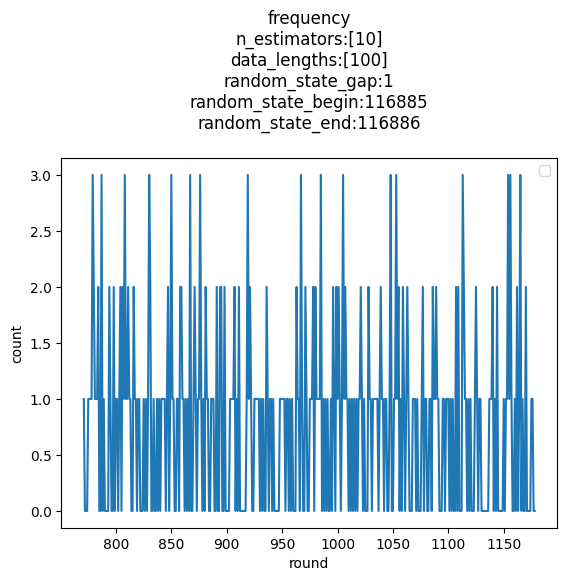

cur_step_09 2025-06-27 18:58:39.427808
predicted_numbers (116885, [[7, 12, 24, 28, 34, 41]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:05<?, ?it/s]


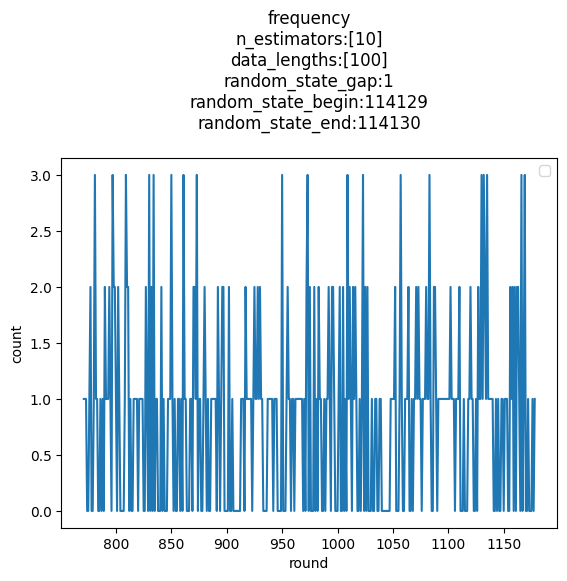

cur_step_09 2025-06-27 18:58:45.130561
predicted_numbers (114129, [[8, 12, 22, 30, 33, 41]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


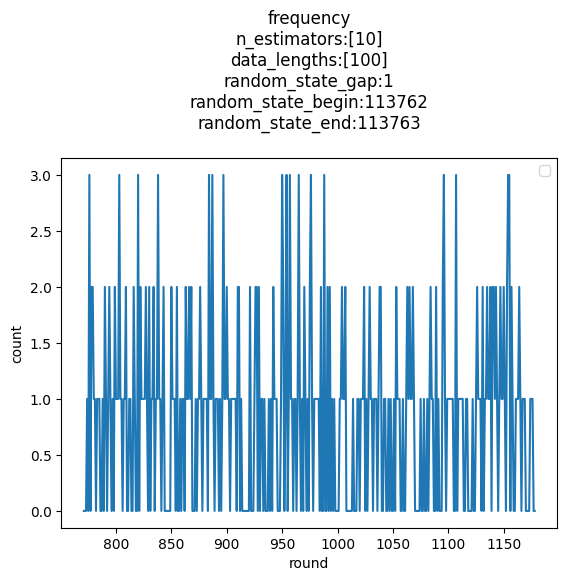

cur_step_09 2025-06-27 18:58:50.551232
predicted_numbers (113762, [[9, 13, 22, 26, 32, 38]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


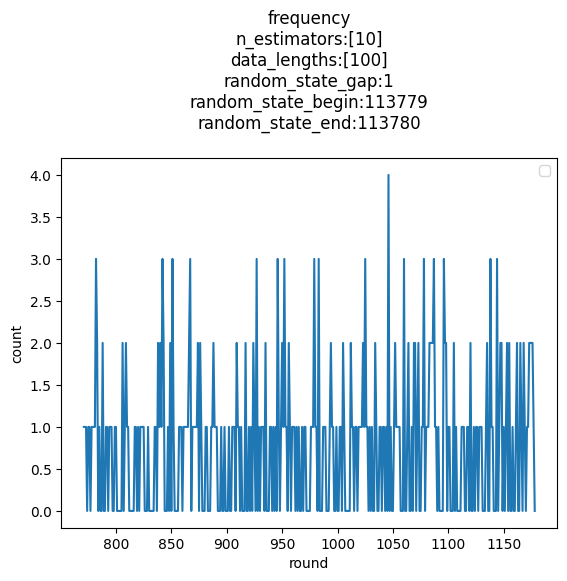

cur_step_09 2025-06-27 18:58:55.973473
predicted_numbers (113779, [[7, 12, 21, 26, 33, 40]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


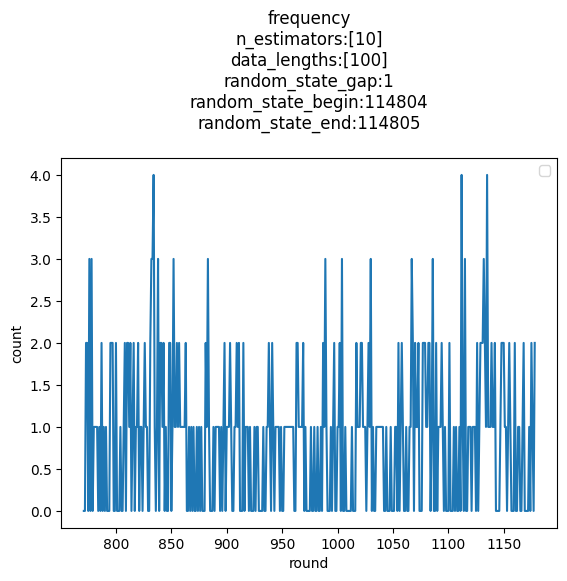

cur_step_09 2025-06-27 18:59:01.369846
predicted_numbers (114804, [[8, 11, 18, 25, 31, 42]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


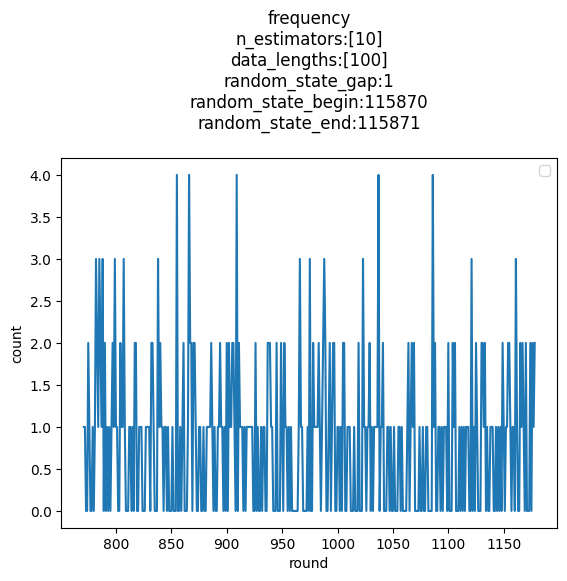

cur_step_09 2025-06-27 18:59:06.818446
predicted_numbers (115870, [[8, 11, 19, 26, 30, 43]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


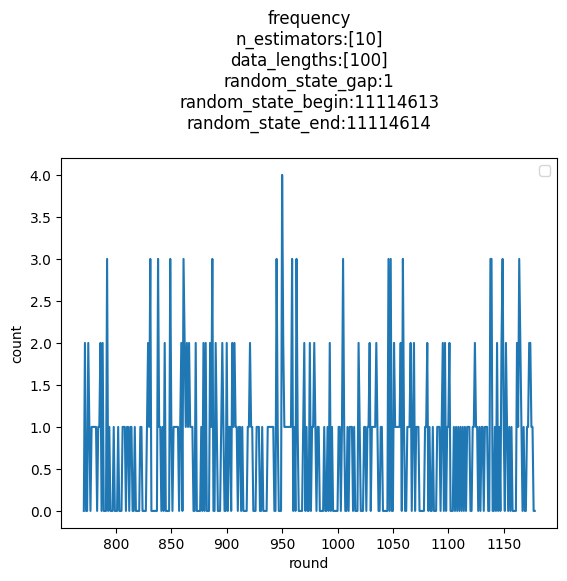

cur_step_09 2025-06-27 18:59:12.312059
predicted_numbers (11114613, [[8, 12, 21, 26, 31, 39]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


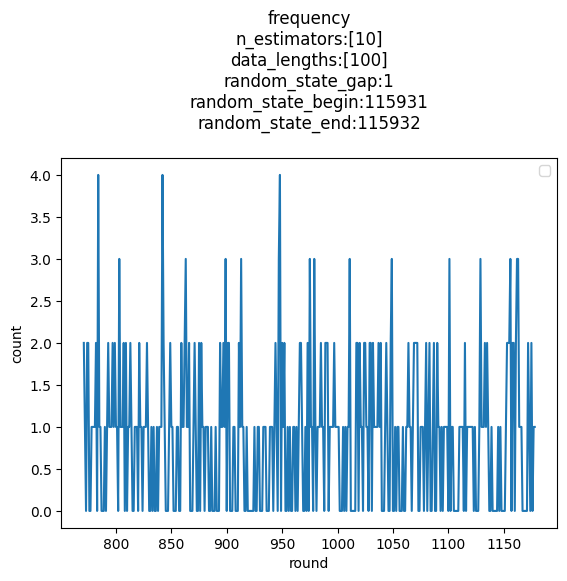

cur_step_09 2025-06-27 18:59:17.375812
predicted_numbers (115931, [[8, 12, 22, 24, 28, 40]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


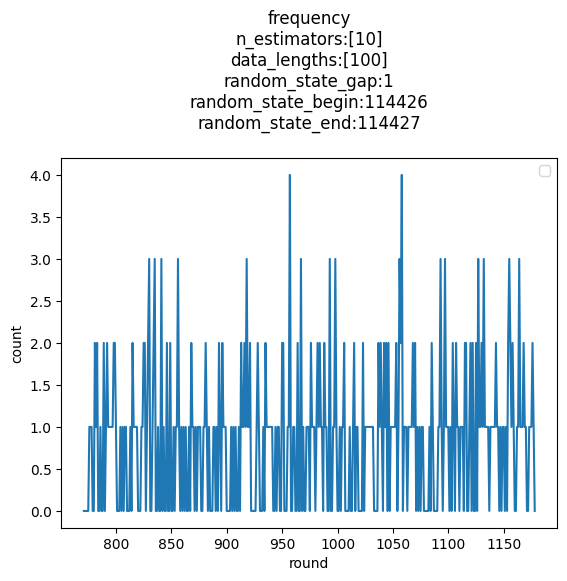

cur_step_09 2025-06-27 18:59:22.616116
predicted_numbers (114426, [[7, 12, 20, 23, 30, 41]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


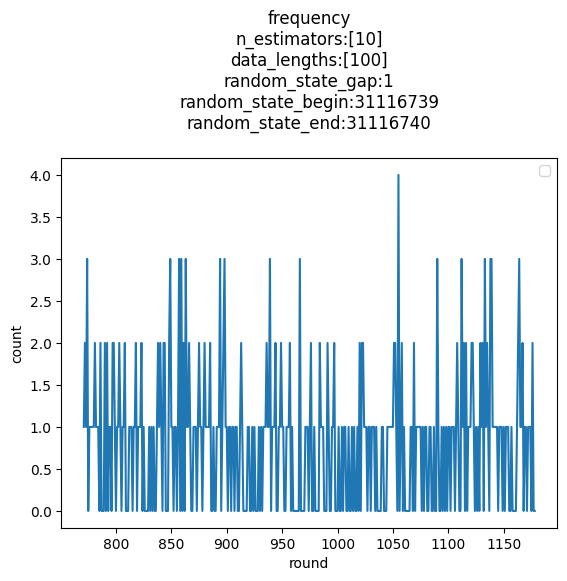

cur_step_09 2025-06-27 18:59:27.672619
predicted_numbers (31116739, [[6, 9, 21, 28, 32, 42]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


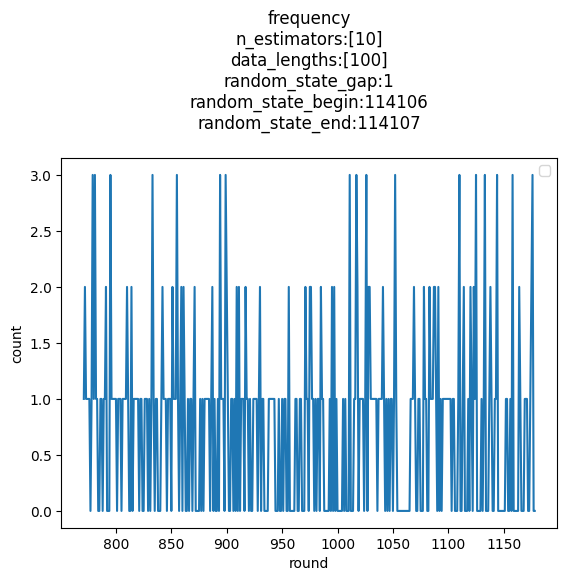

cur_step_09 2025-06-27 18:59:32.945295
predicted_numbers (114106, [[9, 12, 21, 26, 30, 40]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


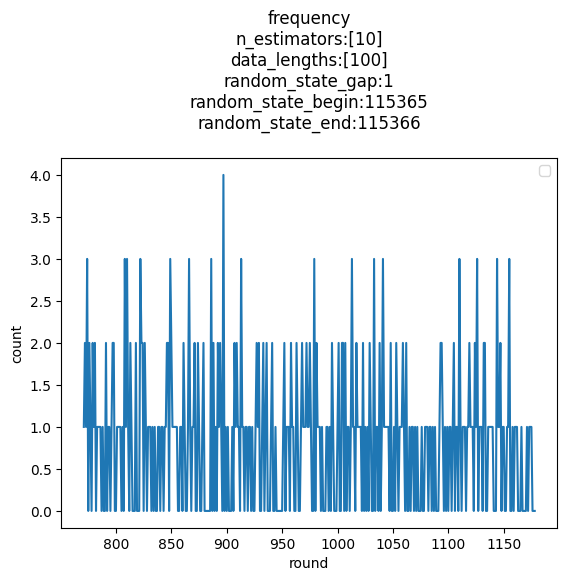

cur_step_09 2025-06-27 18:59:38.000439
predicted_numbers (115365, [[8, 13, 22, 29, 33, 42]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


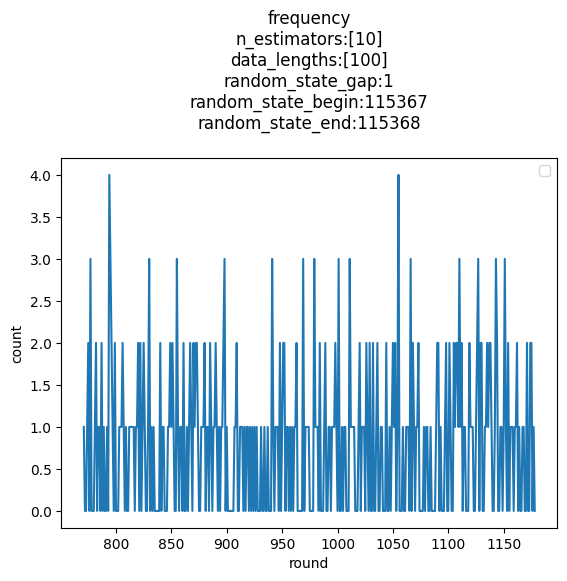

cur_step_09 2025-06-27 18:59:43.245389
predicted_numbers (115367, [[10, 13, 19, 23, 28, 40]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


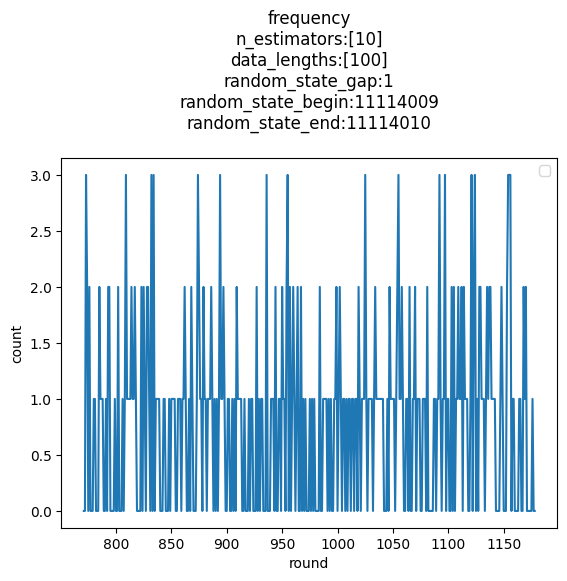

cur_step_09 2025-06-27 18:59:48.357844
predicted_numbers (11114009, [[8, 11, 22, 29, 36, 40]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


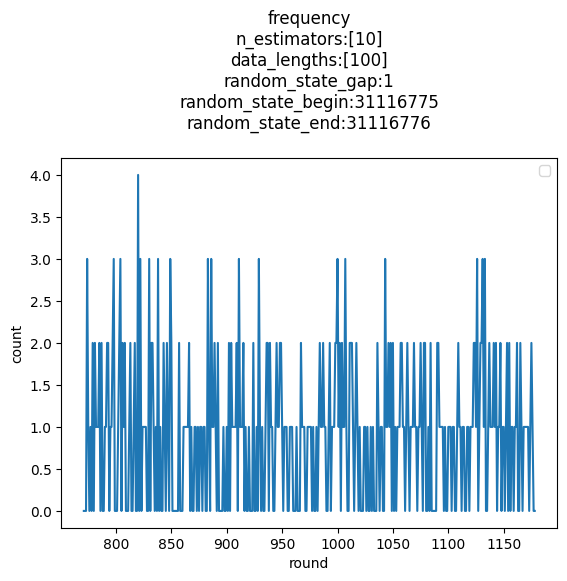

cur_step_09 2025-06-27 18:59:53.551914
predicted_numbers (31116775, [[8, 13, 21, 27, 34, 41]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


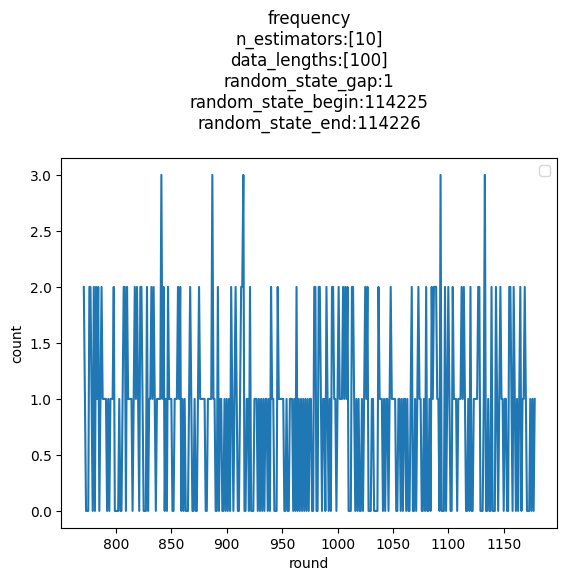

cur_step_09 2025-06-27 18:59:58.635666
predicted_numbers (114225, [[10, 13, 20, 24, 30, 40]])
latest ['578|1178|3,7,15,16,19,43|21']


  0%|          | 0/1 [00:04<?, ?it/s]


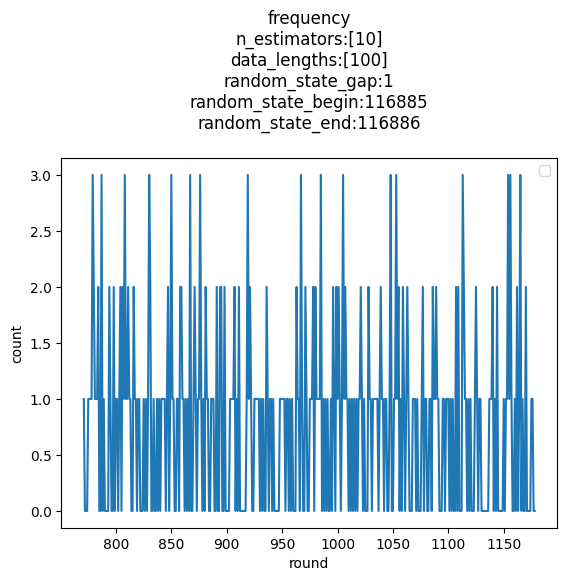

cur_step_09 2025-06-27 19:00:03.927865
predicted_numbers (116885, [[7, 12, 24, 28, 34, 41]])
latest ['578|1178|3,7,15,16,19,43|21']


[7, 12, 24, 28, 34, 41]


In [9]:
#45,96800,4,3,1

predicted_numbers_set = []

db_file_path = '../db/metrics.db'

## predict data
for key in params:
    cur_params = params[key]
    # print('cur_params = ', key, cur_params)
    if cur_params['updated'] == False:
        !echo "delete from rndforest where version=\"{cur_params["version"]}\"" | sqlite3 {db_file_path}
        # print(f'cur_step_01 {datetime.now()}')
        result_sets = main(parameters=cur_params,
                           version=cur_params["version"],
                           sum_min=0,
                           sum_max=-1,
                           trial=1,
                           write_to_db=True)
        # print(f'cur_step_03 {datetime.now()}')
        ## SQL Query
        condition = {
            "n_estimators": cur_params["n_estimators"],
            "data_lengths": cur_params["data_lengths"],
            "random_state_gap": cur_params["random_state_gap"],
            "random_state_begin": cur_params["random_state_begin"],
            "random_state_end": cur_params["random_state_end"],
        }
        # print(f'draw graph : [{datetime.now()}')
        # print(f'cur_step_05 {datetime.now()}')
        file_name = key
        draw_graph(version=cur_params["version"], condition=condition, file_name=file_name)
        data = !echo "select * from rndforest where version=\"{cur_params["version"]}\"" | sqlite3 {db_file_path}
        # print(data)
        # print(f'cur_step_07 {datetime.now()}')
        predicted_numbers = main_predict(n_estimator=cur_params["n_estimators"][0],
                                         last_round=1176,
                                         data_length=cur_params["data_lengths"][0],
                                         random_state=cur_params["random_state_begin"],
                                         db_file_path=db_file_path,
                                         trial=1,
                                         verbose=0)
        predicted_numbers_set.append((cur_params["random_state_begin"],predicted_numbers))
        print(f'cur_step_09 {datetime.now()}')
        print('predicted_numbers', (cur_params["random_state_begin"],predicted_numbers))
        latest = !echo "select * from results order by round desc limit 1" | sqlite3 {db_file_path}
        print('latest', latest)
        cur_params['updated'] = True
print(f'\n\n{"="*45}')
for pre in predicted_numbers:
    print(pre)

In [10]:
for pre in predicted_numbers_set:
    print(pre)

(116885, [[7, 12, 24, 28, 34, 41]])
(114129, [[8, 12, 22, 30, 33, 41]])
(113762, [[9, 13, 22, 26, 32, 38]])
(113779, [[7, 12, 21, 26, 33, 40]])
(114804, [[8, 11, 18, 25, 31, 42]])
(115870, [[8, 11, 19, 26, 30, 43]])
(11114613, [[8, 12, 21, 26, 31, 39]])
(115931, [[8, 12, 22, 24, 28, 40]])
(114426, [[7, 12, 20, 23, 30, 41]])
(31116739, [[6, 9, 21, 28, 32, 42]])
(114106, [[9, 12, 21, 26, 30, 40]])
(115365, [[8, 13, 22, 29, 33, 42]])
(115367, [[10, 13, 19, 23, 28, 40]])
(11114009, [[8, 11, 22, 29, 36, 40]])
(31116775, [[8, 13, 21, 27, 34, 41]])
(114225, [[10, 13, 20, 24, 30, 40]])
(116885, [[7, 12, 24, 28, 34, 41]])


In [ ]:
(116885, [[7, 12, 24, 28, 34, 41]])
(113762, [[9, 13, 22, 26, 32, 38]])

(115870, [[8, 11, 19, 26, 30, 43]])


(116885, [[7, 12, 24, 28, 34, 41]])
(115365, [[8, 13, 22, 29, 33, 42]])
(115367, [[10, 13, 19, 23, 28, 40]])
(11114009, [[8, 11, 22, 29, 36, 40]])



(114225, [[10, 13, 20, 24, 30, 40]])
(11114613, [[8, 12, 21, 26, 31, 39]])
(31116739, [[6, 9, 21, 28, 32, 42]])
(114106, [[9, 12, 21, 26, 30, 40]])
(31116775, [[8, 13, 21, 27, 34, 41]])


